#**Neural Network on CIFAR10 Dataset**
---

**Name** : Kamran Naveed Syed 

**CMS ID** : 266897

**School** : SEECS

---


The nueral network model will be trained on CIFAR-10 dataset.

The CIFAR-10 dataset consists of **60000 32x32** colour images in 10 classes, with **6000** images per class. There are **50000 training images** and **10000 test images.**

**LIBRARIES USED**

Following libraries will be used in training the model


*   Tensorflow 
*   Numpy
*   Matplotlib
*   Sklearn
*   Random


##**Imports**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
import math
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix as cmx
import tensorflow as tf
from tensorflow.keras import models, layers, datasets, regularizers
tf.random.set_seed(5)

##  **Visualization**






CIFAR-10 dataset is already preloaded in keras, thus we only have to import it. Importing it returns a tuple of numpy array dividing the dataset into training and test batches.

CIFAR-10 contains coloured 6000 images of 10 classes each. Samples from each class are shown as an insanity check. We can see that the dataset conatins images which are small (32x32 px) and do not have good resolution when displayed.

The labels for the 10 classes are as follows:
* airplane : 0
* automobile : 1
* bird : 2
* cat : 3
* deer : 4
* dog : 5
* frog : 6
* horse : 7
* ship : 8
* truck : 9

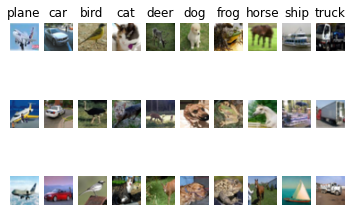

In [ ]:
#Load the pre-loaded dataset from keras
(train_images_full, train_labels_full), (test_images, test_labels) = datasets.cifar10.load_data() 

#Class details
classes = [ 'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)

#Plot n samples of each class
samples = 3
for y, class_name in enumerate(classes):
    indexes = np.flatnonzero(train_labels_full == y)
    indexes = np.random.choice(indexes, samples, replace=False)
    for i, index in enumerate(indexes):
        plt_index = i * num_classes + y + 1
        plt.subplot(samples, num_classes, plt_index)
        plt.imshow(train_images_full[index].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(class_name)
plt.show()


##**Preprocessing**

The original training dataset is further divided into validation data set and training dataset.

* The validation batch will have **10000** images taken from the original training batch
* The training batch for the model will have **40000** images
* The testing set will have **10000** images


In [ ]:
# Separate into training, testing and validation sets
val_split = 0.2
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images_full, train_labels_full, test_size=0.20, random_state=1) 

print("Total Training images in original dataset: %d"% train_images_full.shape[0])
print("Training images used in model: %d"% train_images.shape[0])
print("Validation images: %d"% validation_images.shape[0])
print("Testing images: %d"% test_images.shape[0])
print("Image sizes: %d x %d px with %d RGB colours each" % train_images_full.shape[1:])


Total Training images in original dataset: 50000
Training images used in model: 40000
Validation images: 10000
Testing images: 10000
Image sizes: 32 x 32 px with 3 RGB colours each


**Normalization**

The data is then normalizedin the range (0,1) by dividing each value by 255, since 255 is the maximum value for RGB. 

Normalisation of data in the range (0,1) is done because, in probability theory, which is the foundation of machine learning, probability is measured in this range. Therefore, it is more convenient and should improve the activation function's performance later on for eg. the sigmoid function works more efficiently with data range 0.0-1.0. We normalise both train and test data.

However, normalization does not improve performances in all cases, but is a good habit nonetheless.

In [ ]:
#Normalizing in the range (0,1) for improved performance, using 255 as it is max value of RGB
train_images = np.float32(train_images/255.0) #converted to float types for better accuracy
validation_images = np.float32(validation_images/255.0)
test_images = np.float32( test_images/255.0)

A custom function is defined which will help us assess the performance of our model later on

In [ ]:
#Defining a function for evaluation of each model
def plot_evaluations(model_history,epochs_):
  ''' This function plots Validation losses and accuracies, and Training losses and accuracies against epochs traversed'''
  
  plt.subplot(121)
  acc_ = model_history.history['accuracy']
  val_acc_ = model_history.history['val_accuracy']
  epochs = [epoch for epoch in range(1,epochs_+1)]
  plt.plot(epochs, acc_,label = 'Training Accuracy', c='r')
  plt.plot(epochs, val_acc_,label = 'Validation Acurracy', c='b')
  plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 0, 0.5, 0.5))
  plt.title('Accuracy Plot')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.ylim(ymin=0)
  plt.show()

  plt.subplot(122)
  loss_ = model_history.history['loss']
  val_loss_ = model_history.history['val_loss']
  epochs = [epoch for epoch in range(1,epochs_+1)]
  plt.plot(epochs, loss_,label = 'Training Loss', c='r')
  plt.plot(epochs, val_loss_,label = 'Validation Loss', c='b')
  plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 0, 0.5, 0.5))
  plt.title('Loss Plot')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.ylim(ymin=0)
  plt.show()

## **Training and evaluating the Classifier**

Please Allow 10 mins for this section to run

In [ ]:
epochs_ = 20 #number of epochs used in each variation

###**Variation 1: Simple NN**

Implementing  neural network with 5 hidden layers with 256 nodes each

In [ ]:
#Implementing 5 hidden layers with 256 nodes each

#Desigining the network
model1 = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(256, activation = 'swish'),
    layers.Dense(256, activation = 'swish'),
    layers.Dense(256, activation = 'swish'),
    layers.Dense(256, activation = 'swish'),
    layers.Dense(256, activation = 'swish'),
    layers.Dense(10, activation = 'softmax')
])

#Compile model
model1.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#Fit model on training data 
model1_history = model1.fit(train_images, train_labels, epochs=epochs_, validation_data=(validation_images, validation_labels))

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9743 - accuracy: 0.2681 - val_loss: 1.8493 - val_accuracy: 0.3229
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7225 - accuracy: 0.3732 - val_loss: 1.6917 - val_accuracy: 0.3963
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6110 - accuracy: 0.4233 - val_loss: 1.5753 - val_accuracy: 0.4330
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5562 - accuracy: 0.4422 - val_loss: 1.5792 - val_accuracy: 0.4401
Epoch 5/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5012 - accuracy: 0.4604 - val_loss: 1.5672 - val_accuracy: 0.4349
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4603 - accuracy: 0.4730 - val_loss: 1.5158 - val_accuracy: 0.4562
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4145 - accuracy: 0.4928 - val_loss: 1.4992 - val_accuracy:

We now evaluate the model:

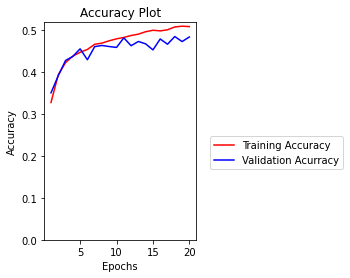

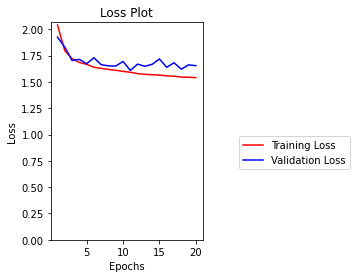

In [ ]:
plot_evaluations(model_history,epochs_)

In [ ]:
model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 2ms/step - loss: 1.6346 - accuracy: 0.4839


[1.6346181631088257, 0.4839000105857849]

###**Variation 2: L2 Norm Regularization**

Implementing  neural network with 5 hidden layers with 256 nodes each and L2-regularization

In [ ]:
#Implementing 512-264-128-64 tapered 4 layer architecture 

l2_alpha = 0.005 #good parameter

#Desigining the network
model1 = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(512, activation = 'swish', kernel_regularizer=regularizers.l2(l2_alpha)), #kernel regularizations
    layers.Dense(256, activation = 'swish', kernel_regularizer=regularizers.l2(l2_alpha)),
    layers.Dense(128, activation = 'swish', kernel_regularizer=regularizers.l2(l2_alpha)),
    layers.Dense(64, activation = 'swish',kernel_regularizer=regularizers.l2(l2_alpha)),
    layers.Dense(10, activation = 'softmax')
])

#Compile model
model1.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#Fit model on training data 
model1_history = model1.fit(train_images, train_labels, epochs=epochs_, validation_data=(validation_images, validation_labels))

Epoch 1/20
1250/1250 [==============================] - 5s 3ms/step - loss: 3.4265 - accuracy: 0.2361 - val_loss: 2.0857 - val_accuracy: 0.3084
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0739 - accuracy: 0.3093 - val_loss: 2.0031 - val_accuracy: 0.3291
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0048 - accuracy: 0.3298 - val_loss: 1.9873 - val_accuracy: 0.3429
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9925 - accuracy: 0.3361 - val_loss: 1.9996 - val_accuracy: 0.3159
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9565 - accuracy: 0.3433 - val_loss: 1.9102 - val_accuracy: 0.3626
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9511 - accuracy: 0.3498 - val_loss: 1.9627 - val_accuracy: 0.3539
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9387 - accuracy: 0.3516 - val_loss: 1.9192 - val_accuracy:

We now evaluate the model:

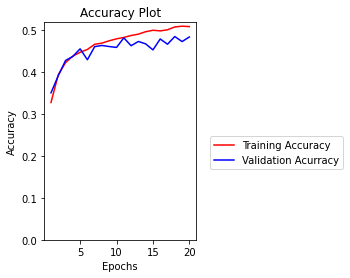

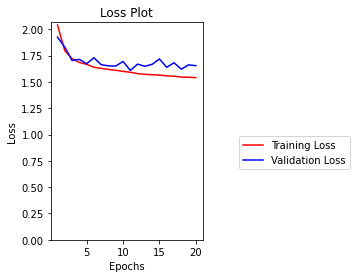

In [ ]:
plot_evaluations(model_history,epochs_)

In [ ]:
model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 2ms/step - loss: 1.6346 - accuracy: 0.4839


[1.6346181631088257, 0.4839000105857849]

###**Variation 3: Dropout**

Implementing  neural network with 25% dropout strategy







In [ ]:
#Implementing  neural network with 25% dropout strategy

l2_alpha = 0.005 #good parameter
drop_rate = 0.25 #good paramter

#Desigining the network
model1 = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(512, activation = 'swish', kernel_regularizer=regularizers.l2(l2_alpha)),
    layers.Dense(256, activation = 'swish', kernel_regularizer=regularizers.l2(l2_alpha)),
    layers.Dense(128, activation = 'swish', kernel_regularizer=regularizers.l2(l2_alpha)),
    layers.Dense(64, activation = 'swish',kernel_regularizer=regularizers.l2(l2_alpha)),
    layers.Dropout(drop_rate, noise_shape=None, seed=None), #Dropout layer
    layers.Dense(10, activation = 'softmax')
])

#Compile model
model1.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#Fit model on training data 
model1_history = model1.fit(train_images, train_labels, epochs=epochs_, validation_data=(validation_images, validation_labels))

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 3.5788 - accuracy: 0.2232 - val_loss: 2.0959 - val_accuracy: 0.2847
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0872 - accuracy: 0.2812 - val_loss: 2.0063 - val_accuracy: 0.3023
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0234 - accuracy: 0.3045 - val_loss: 1.9695 - val_accuracy: 0.3324
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0166 - accuracy: 0.3126 - val_loss: 2.0041 - val_accuracy: 0.3081
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9814 - accuracy: 0.3242 - val_loss: 1.9653 - val_accuracy: 0.3337
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9750 - accuracy: 0.3364 - val_loss: 1.9908 - val_accuracy: 0.3367
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9498 - accuracy: 0.3415 - val_loss: 1.9952 - val_accuracy:

We now evaluate the model:

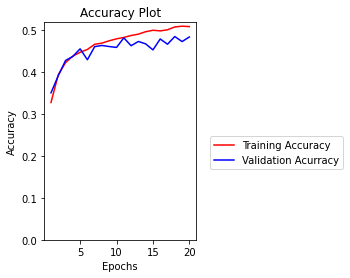

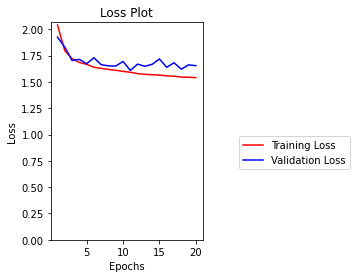

In [ ]:
plot_evaluations(model_history,epochs_)

In [ ]:
model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 2ms/step - loss: 1.6346 - accuracy: 0.4839


[1.6346181631088257, 0.4839000105857849]